In [196]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Import the Datasist Library
import datasist as ds


#Read in data set
train_data = pd.read_csv('data/training.csv')
test_data = pd.read_csv('data/test.csv')

In [197]:
id_sub = test_data['TransactionId']

Quick summary of a data set using the describe function in the structdata module

In [198]:
# ds.structdata.describe(train_data)

Remove features that contains only one unique field as these features are redundant

In [199]:
#Drop redundant features
ds.feature_engineering.drop_redundant(data=train_data)
ds.feature_engineering.drop_redundant(data=test_data)

Dropped ['CurrencyCode', 'CountryCode']
Dropped ['CurrencyCode', 'CountryCode']


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,TransactionId_116198,BatchId_117348,AccountId_4841,SubscriptionId_3829,CustomerId_5225,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:56:28Z,2
45015,TransactionId_24829,BatchId_53630,AccountId_4803,SubscriptionId_1738,CustomerId_5272,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:57:38Z,1
45016,TransactionId_102920,BatchId_112209,AccountId_4817,SubscriptionId_4613,CustomerId_5286,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:59:17Z,1
45017,TransactionId_128439,BatchId_58734,AccountId_4841,SubscriptionId_3829,CustomerId_5286,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:59:39Z,2


Check for missing values in dataset with the display function

EXPLORATION OF CATEGORICAL FEATURES

In [200]:
cat_feats = ds.structdata.get_cat_feats(train_data)

In [201]:
cat_feats

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'TransactionStartTime']

In [202]:
ds.structdata.get_unique_counts(train_data)

,Feature,Unique Count
0,TransactionId,95662
1,BatchId,94809
2,AccountId,3633
3,SubscriptionId,3627
4,CustomerId,3742
5,CurrencyCode,1
6,ProviderId,6
7,ProductId,23
8,ProductCategory,9
9,ChannelId,4


From the unique display output, we notice that the TransactionId and BatchId contains too many classes and thus we can drop them

In [203]:
train_data.drop(['TransactionId', 'BatchId'], axis=1, inplace=True)
test_data.drop(['TransactionId', 'BatchId'], axis=1, inplace=True)

VISUALIZATION FOR CATEGORICAL FEATURES

Unique Values in AccountId is too large to plot


Unique Values in SubscriptionId is too large to plot


Unique Values in CustomerId is too large to plot


Unique Values in TransactionStartTime is too large to plot




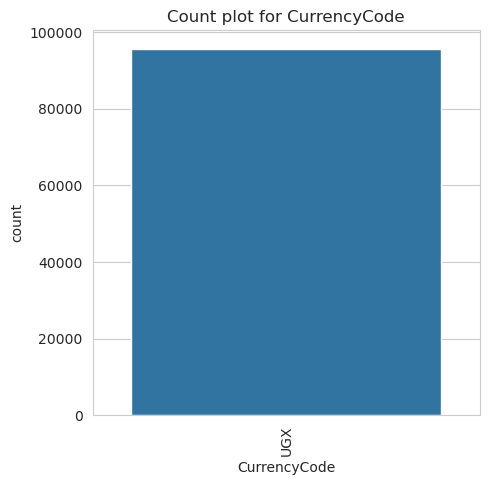

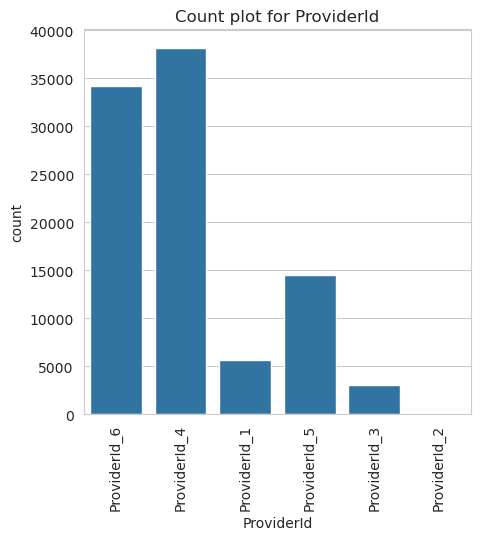

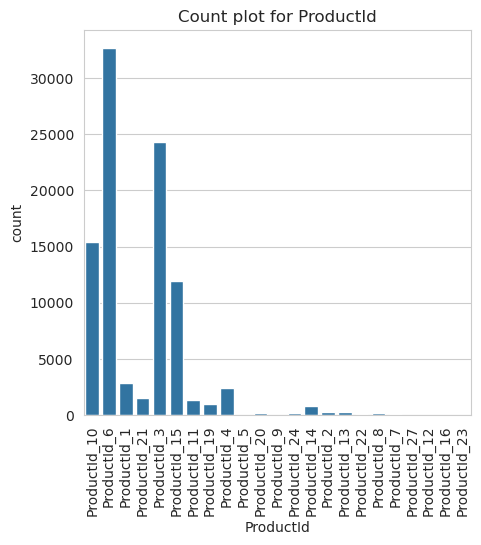

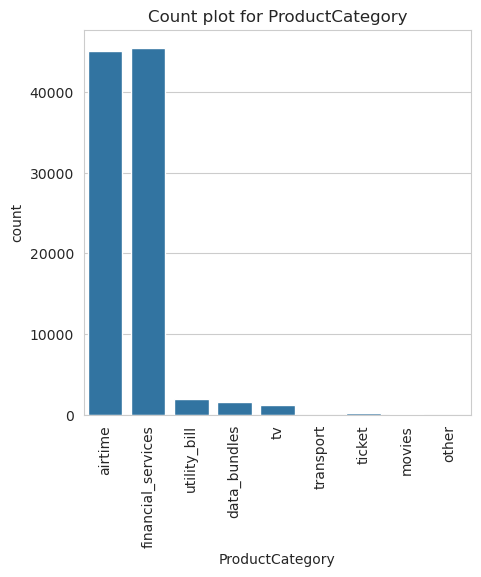

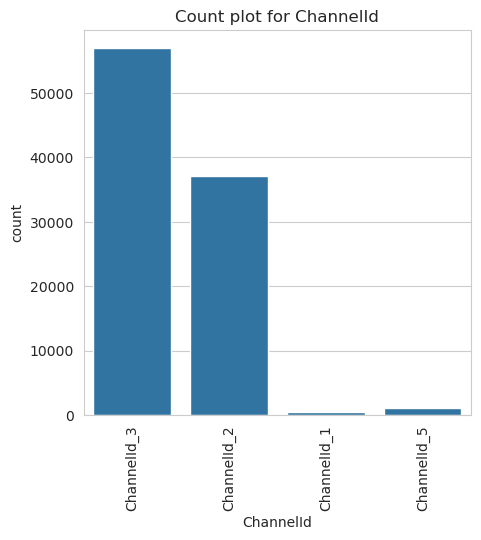

In [204]:
ds.visualizations.countplot(train_data)

In [205]:
ds.visualizations.class_count(train_data)

Unique classes in AccountId too large
Unique classes in SubscriptionId too large
Unique classes in CustomerId too large
Class Count for CurrencyCode


,count
CurrencyCode,
UGX,95662


Class Count for ProviderId


,count
ProviderId,
ProviderId_4,38189
ProviderId_6,34186
ProviderId_5,14542
ProviderId_1,5643
ProviderId_3,3084
ProviderId_2,18


Unique classes in ProductId too large
Class Count for ProductCategory


,count
ProductCategory,
financial_services,45405
airtime,45027
utility_bill,1920
data_bundles,1613
tv,1279
ticket,216
movies,175
transport,25
other,2


Class Count for ChannelId


,count
ChannelId,
ChannelId_3,56935
ChannelId_2,37141
ChannelId_5,1048
ChannelId_1,538


Unique classes in TransactionStartTime too large


In [206]:
train_data.columns

Index(['AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'Amount', 'Value', 'TransactionStartTime',
       'PricingStrategy', 'FraudResult'],
      dtype='object')

In [207]:
# ds.visualizations.catbox(data=train_data, target='FraudResult', fig_size=(7,7))

VISUALIZATION OF NUMERICAL FEATURES

/home/ahmad-guler/anaconda3/envs/titanic/lib/python3.12/site-packages/datasist/visualizations.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].values, ax=ax, bins=bins)
/home/ahmad-guler/anaconda3/envs/titanic/lib/python3.12/site-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


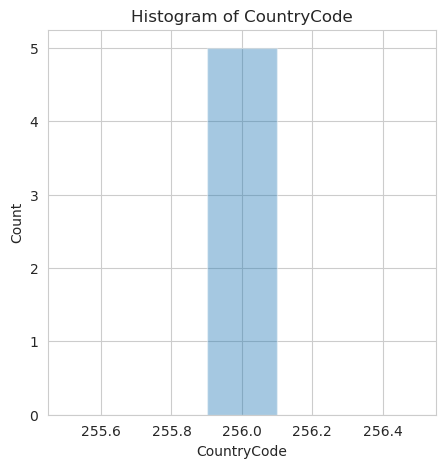

/home/ahmad-guler/anaconda3/envs/titanic/lib/python3.12/site-packages/datasist/visualizations.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].values, ax=ax, bins=bins)


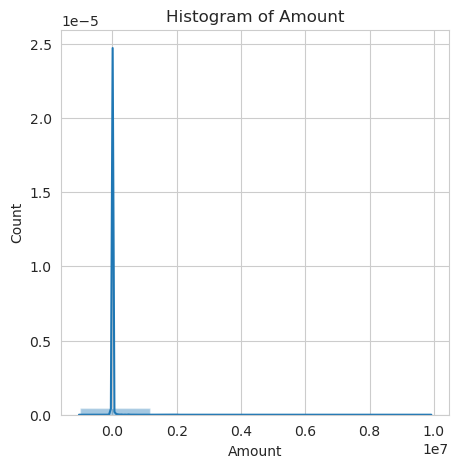

/home/ahmad-guler/anaconda3/envs/titanic/lib/python3.12/site-packages/datasist/visualizations.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].values, ax=ax, bins=bins)


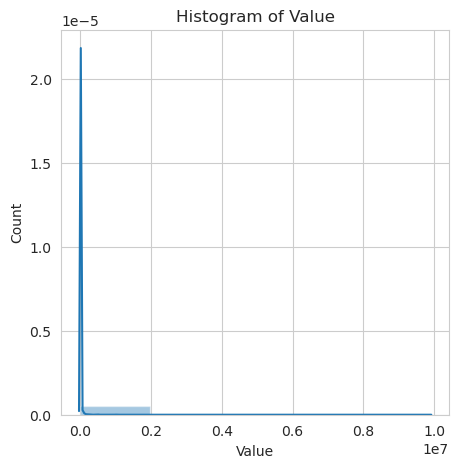

/home/ahmad-guler/anaconda3/envs/titanic/lib/python3.12/site-packages/datasist/visualizations.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].values, ax=ax, bins=bins)


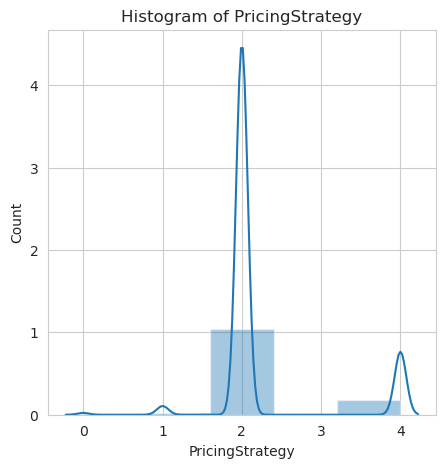

/home/ahmad-guler/anaconda3/envs/titanic/lib/python3.12/site-packages/datasist/visualizations.py:292: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].values, ax=ax, bins=bins)


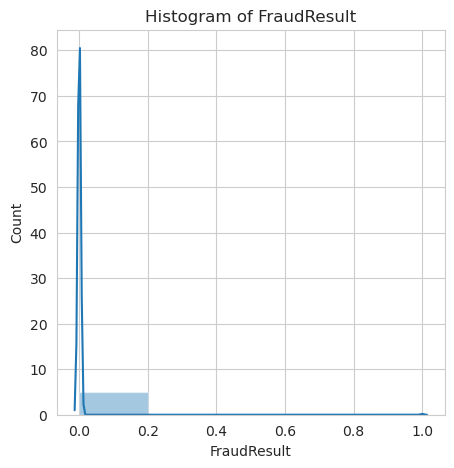

In [208]:
ds.visualizations.histogram(train_data, fig_size=(5,5), bins=5)

In [209]:
# ds.visualizations.boxplot(data=train_data, target='FraudResult', fig_size=(5,5))

TIME FEATURES

In [210]:
date_feats = ds.structdata.get_date_cols(train_data)

In [211]:
date_feats

{'TransactionStartTime'}

VISUALIZATION OF TIME FEATURES

In [212]:
# train_data[date_feats].head()
import datasist.timeseries as ts
print(dir(ts))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_map_hours', 'describe_date', 'display', 'extract_dates', 'extract_time', 'get_cat_feats', 'get_date_cols', 'get_num_feats', 'get_period_of_day', 'get_time_elapsed', 'np', 'pd', 'plt', 'set_date_index', 'sns', 'timeplot']


In [213]:
num_feats = ds.structdata.get_num_feats(train_data)

# ds.timeseries.num_timeplot(data=train_data,num_cols=num_feats, time_col='TransactionStartTime')

The extract_dates function in the timeseries module can extract date information from a datetime column automatically.

In [ ]:
# train_data = ds.timeseries.extract_dates(data=train_data, date_cols=['TransactionStartTime'])
train_data['TransactionStartTime'] = pd.to_datetime(train_data['TransactionStartTime'], errors='coerce')
train_data['TransactionStartTime_dow'] = train_data['TransactionStartTime'].dt.day_name()
train_data['TransactionStartTime_doy'] = train_data['TransactionStartTime'].dt.dayofyear
train_data['TransactionStartTime_dom'] = train_data['TransactionStartTime'].dt.day
train_data['TransactionStartTime_hr'] = train_data['TransactionStartTime'].dt.hour
train_data['TransactionStartTime_min'] = train_data['TransactionStartTime'].dt.minute
train_data['TransactionStartTime_is_wkd'] = train_data['TransactionStartTime'].dt.weekday >= 5  # 1 si week-end, 0 sinon
train_data['TransactionStartTime_yr'] = train_data['TransactionStartTime'].dt.year
train_data['TransactionStartTime_qtr'] = train_data['TransactionStartTime'].dt.quarter
train_data['TransactionStartTime_mth'] = train_data['TransactionStartTime'].dt.month

train_data.drop('TransactionStartTime', axis=1, inplace=True)


test_data['TransactionStartTime'] = pd.to_datetime(test_data['TransactionStartTime'], errors='coerce')
test_data['TransactionStartTime_dow'] = test_data['TransactionStartTime'].dt.day_name()
test_data['TransactionStartTime_doy'] = test_data['TransactionStartTime'].dt.dayofyear
test_data['TransactionStartTime_dom'] = test_data['TransactionStartTime'].dt.day
test_data['TransactionStartTime_hr'] = test_data['TransactionStartTime'].dt.hour
test_data['TransactionStartTime_min'] = test_data['TransactionStartTime'].dt.minute
test_data['TransactionStartTime_is_wkd'] = test_data['TransactionStartTime'].dt.weekday >= 5  # 1 si week-end, 0 sinon
test_data['TransactionStartTime_yr'] = test_data['TransactionStartTime'].dt.year
test_data['TransactionStartTime_qtr'] = test_data['TransactionStartTime'].dt.quarter
test_data['TransactionStartTime_mth'] = test_data['TransactionStartTime'].dt.month

test_data.drop('TransactionStartTime', axis=1, inplace=True)

# test_data = ds.timeseries.extract_dates(data=test_data, date_cols=['TransactionStartTime'])

In [215]:
train_data.head(2).T

,0,1
AccountId,AccountId_3957,AccountId_4841
SubscriptionId,SubscriptionId_887,SubscriptionId_3829
CustomerId,CustomerId_4406,CustomerId_4406
CurrencyCode,UGX,UGX
CountryCode,256,256
ProviderId,ProviderId_6,ProviderId_4
ProductId,ProductId_10,ProductId_6
ProductCategory,airtime,financial_services
ChannelId,ChannelId_3,ChannelId_2
Amount,1000.0,-20.0


### MERGE DATA AND ENCODE CATEGORICAL FEATURES

In [216]:
#perform merge 
all_data, ntrain, ntest = ds.structdata.join_train_and_test(train_data, test_data)

#Label Encode Large Categorical features
large_cats = ['AccountId', 'SubscriptionId', 'CustomerId', 'ProductId']

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for cat in large_cats:
    all_data[cat] = lb.fit_transform(all_data[cat])

# One hot encode small categorical features
all_data = pd.get_dummies(all_data, drop_first=True)

#Get traina nd test set back
train = all_data[:ntrain]
test = all_data[ntrain:]

#Get target and drop it
target = train['FraudResult']
train.drop('FraudResult', axis=1, inplace=True)
test.drop('FraudResult', axis=1, inplace=True)

print("Shape of training datasets is {}".format(train.shape))
print("Shape of training target is {}".format(test.shape))
print("Shape of target is {}".format(target.shape))

Shape of training datasets is (95662, 40)
Shape of training target is (45019, 40)
Shape of target is (95662,)


/tmp/ipykernel_66385/1935442759.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('FraudResult', axis=1, inplace=True)
/tmp/ipykernel_66385/1935442759.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('FraudResult', axis=1, inplace=True)


### MODELING

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=2)

rf_model = RandomForestClassifier(n_estimators=100,random_state=232)
lg_model = LogisticRegression(max_iter=100, random_state=2, solver='lbfgs')

Next, we will train a two classifiers and get detailed report with the datasist classification report function. Can be used to pick best model for a task.

Accuracy is  100
F1 score is  41
Precision is  58
Recall is  32
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive     28629                13
Actual negative        39                18



/home/ahmad-guler/anaconda3/envs/titanic/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


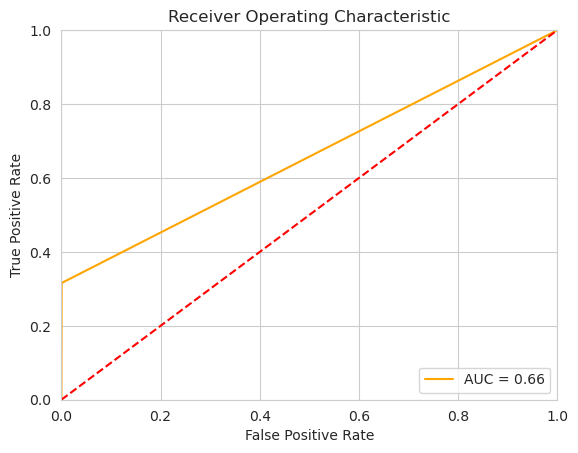

In [218]:
lg_model.fit(X_train, y_train, )
pred = lg_model.predict(X_test)

#Get report from true and predicted values
ds.model.get_classification_report(y_test, pred)

Accuracy is  100
F1 score is  91
Precision is  88
Recall is  93
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive     28635                 7
Actual negative         4                53



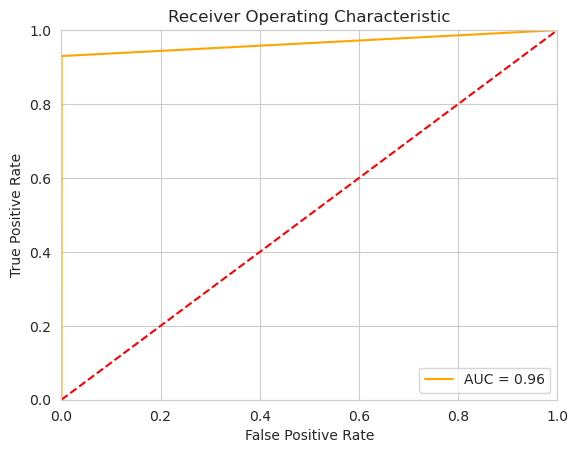

In [219]:
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

#Get report from true and predicted values
ds.model.get_classification_report(y_test, pred)

In [229]:
y_sub = rf_model.predict(test)

sub = pd.DataFrame({
    'TransactionId': id_sub,
    'FraudResult': y_sub.astype(int)
})

sub.to_csv('sample_submission.csv', index=False)

From the metrics reported, we can see that the RandomForest model does better tahn Logistic Regression. Next we can use a cross validation function to detect overfitting.

In [221]:
# ds.model.train_classifier(train_data=train, target=target, model=rf_model, cross_validate=True, cv=3)

Finally, we can plot the feature importance to see the most important feature

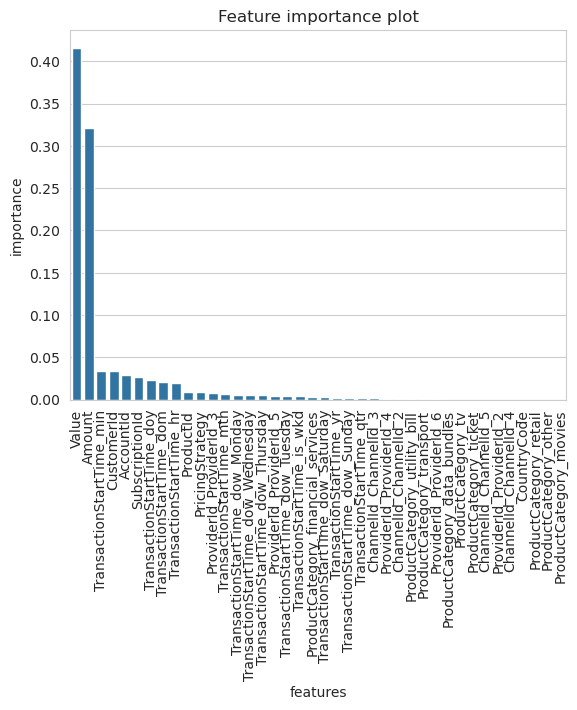

In [222]:
feats = train.columns
ds.model.plot_feature_importance(estimator=rf_model, col_names=feats)